In [1]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
(xtrain,ytrain),(xtest,ytest)=load_data()
print('Train Shape:\t',xtrain.shape,ytrain.shape)
print()
print('Test shape:\t',xtest.shape,ytest.shape)

Train Shape:	 (50000, 32, 32, 3) (50000, 1)

Test shape:	 (10000, 32, 32, 3) (10000, 1)


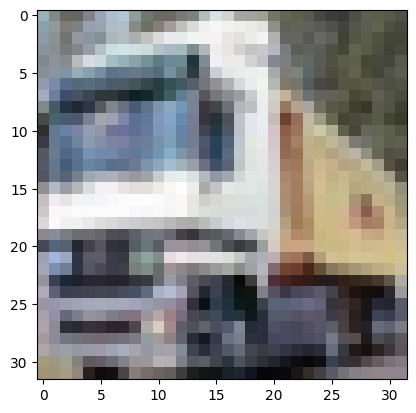

In [2]:
plt.imshow(xtrain[1],cmap='gray')

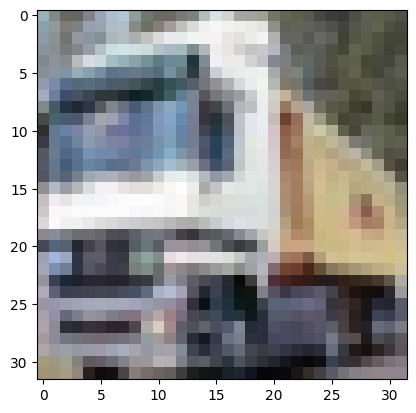

In [3]:
plt.imshow(xtrain[1],cmap='gray_r')

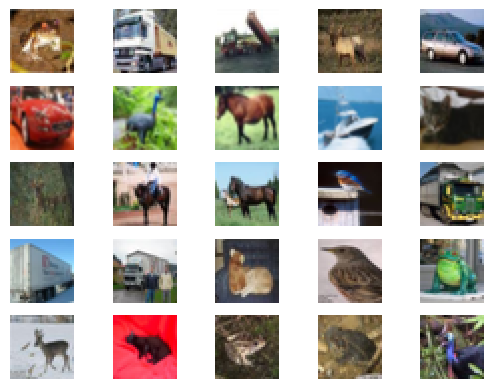

In [4]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(xtrain[i],cmap='gray_r')
    
plt.show()

In [5]:
#import a;; required lib
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Sequential

In [6]:
def discriminator(in_shape=(32,32,3)):
    model=Sequential()
   
    #1st conv layer
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',
                     input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    #2nd conv layer
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    #converting higher dimention to 1D
    model.add(Flatten())
    
    #output layer
    model.add(Dense(1,activation='sigmoid'))
    
    #compile model
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    
    model.compile(loss='binary_crossentropy',optimizer=opt,
                  metrics=['accuracy'])
                  
    return model
                  
model=discriminator()
model.summary()
#plot the model   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 64)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [7]:
from numpy import expand_dims,ones,zeros

def load_real_samples():
    (xtrain,_),(_,_)=load_data()
    x=expand_dims(xtrain,axis=-1)
    x=x.astype('float32')
    x=x/255.
    return x

In [8]:
load_real_samples()

array([[[[[0.23137255],
          [0.24313726],
          [0.24705882]],

         [[0.16862746],
          [0.18039216],
          [0.1764706 ]],

         [[0.19607843],
          [0.1882353 ],
          [0.16862746]],

         ...,

         [[0.61960787],
          [0.5176471 ],
          [0.42352942]],

         [[0.59607846],
          [0.49019608],
          [0.4       ]],

         [[0.5803922 ],
          [0.4862745 ],
          [0.40392157]]],


        [[[0.0627451 ],
          [0.07843138],
          [0.07843138]],

         [[0.        ],
          [0.        ],
          [0.        ]],

         [[0.07058824],
          [0.03137255],
          [0.        ]],

         ...,

         [[0.48235294],
          [0.34509805],
          [0.21568628]],

         [[0.46666667],
          [0.3254902 ],
          [0.19607843]],

         [[0.47843137],
          [0.34117648],
          [0.22352941]]],


        [[[0.09803922],
          [0.09411765],
          [0.08235294]],

    

In [9]:
from numpy.random import rand,randint

def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
    
    y=ones((n_samples,1))
    return x,y

In [10]:
generate_real_samples(load_real_samples(),n_samples=10)

(array([[[[[0.12156863],
           [0.18039216],
           [0.09019608]],
 
          [[0.08235294],
           [0.14509805],
           [0.05490196]],
 
          [[0.07450981],
           [0.14901961],
           [0.05098039]],
 
          ...,
 
          [[0.07058824],
           [0.14901961],
           [0.0627451 ]],
 
          [[0.0627451 ],
           [0.12941177],
           [0.05098039]],
 
          [[0.3764706 ],
           [0.4       ],
           [0.34509805]]],
 
 
         [[[0.11764706],
           [0.2       ],
           [0.10196079]],
 
          [[0.07843138],
           [0.16862746],
           [0.06666667]],
 
          [[0.0627451 ],
           [0.16078432],
           [0.05490196]],
 
          ...,
 
          [[0.07058824],
           [0.16078432],
           [0.07058824]],
 
          [[0.05098039],
           [0.12941177],
           [0.05098039]],
 
          [[0.29411766],
           [0.32941177],
           [0.27058825]]],
 
 
         [[[0.12156863],

In [11]:
def generate_fake_samples(n_samples):
    x=rand(32*32*3*n_samples)
    
    x=x.reshape(n_samples,32,32,3)
    
  
    y=zeros((n_samples,1))
    
    return x,y

In [12]:
generate_fake_samples(10)

(array([[[[0.34352948, 0.43683915, 0.42226038],
          [0.56884429, 0.30936925, 0.32045695],
          [0.53944417, 0.96823332, 0.81727308],
          ...,
          [0.53485153, 0.05033218, 0.59609302],
          [0.87533307, 0.81218453, 0.37076098],
          [0.37860662, 0.26323246, 0.78060281]],
 
         [[0.17541558, 0.45025957, 0.73441258],
          [0.32361499, 0.8527416 , 0.74732609],
          [0.61423176, 0.54338912, 0.54791498],
          ...,
          [0.619662  , 0.59185665, 0.45361691],
          [0.14456184, 0.66258951, 0.20379765],
          [0.82269672, 0.20590756, 0.95802023]],
 
         [[0.66609151, 0.87514587, 0.71301162],
          [0.18956437, 0.60544571, 0.72187665],
          [0.74703871, 0.48407472, 0.52050082],
          ...,
          [0.9663255 , 0.26382979, 0.56320285],
          [0.78162801, 0.76434402, 0.80129044],
          [0.26206421, 0.12670434, 0.43889509]],
 
         ...,
 
         [[0.2714232 , 0.3889695 , 0.65205468],
          [0.39584

In [14]:
def train_discriminative(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch//2)
    
    for i in range(n_iter):
        
        xreal,yreal=generate_real_samples(dataset,half_batch)
        
        
        AA,real_acc=model.train_on_batch(xreal,yreal)
        
       
        xfake,yfake=generate_fake_samples(half_batch)
        
       
        BB,fake_acc=model.train_on_batch(xfake,yfake)
        
        
        print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))
        

In [15]:
model=discriminator()


dataset=load_real_samples()

In [16]:
train_discriminative(model,dataset)

>1 real=80% fake=16%
>2 real=91% fake=16%
>3 real=82% fake=18%
>4 real=78% fake=12%
>5 real=77% fake=24%
>6 real=75% fake=24%
>7 real=77% fake=32%
>8 real=71% fake=30%
>9 real=78% fake=41%
>10 real=69% fake=49%
>11 real=59% fake=53%
>12 real=66% fake=55%
>13 real=53% fake=58%
>14 real=51% fake=67%
>15 real=55% fake=67%
>16 real=54% fake=82%
>17 real=52% fake=77%
>18 real=59% fake=78%
>19 real=41% fake=79%
>20 real=47% fake=88%
>21 real=45% fake=89%
>22 real=34% fake=92%
>23 real=38% fake=85%
>24 real=39% fake=91%
>25 real=44% fake=89%
>26 real=45% fake=96%
>27 real=38% fake=97%
>28 real=45% fake=95%
>29 real=41% fake=98%
>30 real=46% fake=98%
>31 real=36% fake=97%
>32 real=45% fake=99%
>33 real=50% fake=98%
>34 real=60% fake=99%
>35 real=45% fake=98%
>36 real=54% fake=99%
>37 real=53% fake=98%
>38 real=65% fake=98%
>39 real=66% fake=100%
>40 real=63% fake=99%
>41 real=62% fake=100%
>42 real=66% fake=100%
>43 real=62% fake=100%
>44 real=67% fake=100%
>45 real=73% fake=100%
>46 real=73% 

In [17]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

def generator(latent_dim):
    model = Sequential()
    
    n_nodes = 128 * 8 * 8
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model

In [18]:
latent_dim = 100

model = generator(latent_dim)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 128)       262272    
 Transpose)                                           

In [19]:
import numpy as np
from numpy.random import randn

def generate_latent_points(latent_dim, n_samples):
    
    x_input = randn(latent_dim * n_samples)
    
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [20]:
def generate_fake_samples(g_model, latent_dim, n_samples):
   
    x_input = generate_latent_points(latent_dim, n_samples)
    
    X = g_model.predict(x_input)
   
    y = zeros((n_samples, 1))
    return X, y

1/1 [==============================] - 0s 175ms/step


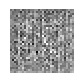

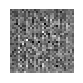

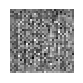

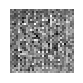

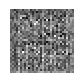

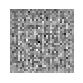

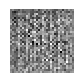

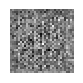

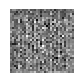

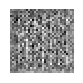

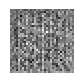

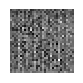

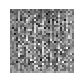

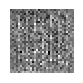

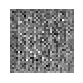

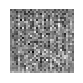

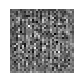

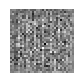

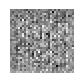

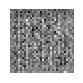

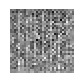

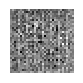

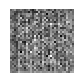

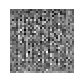

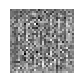

In [21]:
latent_dim = 100

model = generator(latent_dim)

n_samples = 25
x, _ = generate_fake_samples(model, latent_dim, n_samples)

for i in range(n_samples):
   
    plt.subplot(5, 5, 1 + i)
   
    plt.axis('off')
    
    plt.imshow(x[i, :, :, 0], cmap='gray_r')
    
    plt.show()